In [161]:
# %matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, SGDRegressor, LogisticRegression
from ml_libs import metrics
from importlib import reload

In [162]:
reload(metrics)

<module 'ml_libs.metrics' from '/home/aluno/Documentos/prova1/mlap1/ml_libs/metrics.py'>

In [8]:
df = pd.read_csv('breast_cancer_wisconsin_ap1.csv', sep=';')

## Analisando dados

In [26]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                568 non-null float64
mean texture               569 non-null float64
mean perimeter             568 non-null float64
mean area                  566 non-null float64
mean smoothness            568 non-null float64
mean compactness           567 non-null float64
mean concavity             569 non-null float64
mean concave points        567 non-null float64
mean symmetry              567 non-null float64
mean fractal dimension     565 non-null float64
radius error               567 non-null float64
texture error              567 non-null float64
perimeter error            568 non-null float64
area error                 568 non-null float64
smoothness error           565 non-null float64
compactness error          567 non-null float64
concavity error            567 non-null float64
concave points error       568 non-null float64
symmetry error             568 

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,568.000000,569.000000,568.000000,566.000000,568.000000,567.000000,569.000000,567.000000,567.000000,565.000000,...,569.000000,569.000000,567.000000,564.000000,566.000000,568.000000,568.000000,569.000000,567.000000,567.000000
mean,14.123871,19.289649,91.880951,655.933216,0.096349,0.104349,0.088799,0.048944,0.181071,0.062743,...,16.269190,25.677223,107.314109,881.602305,0.132401,0.253691,0.272508,0.114606,0.290057,0.083960
std,3.526210,4.301036,24.229309,352.357395,0.014074,0.052883,0.079720,0.038832,0.027418,0.006969,...,4.833242,6.146258,33.636843,569.744319,0.022876,0.156877,0.208669,0.065732,0.061933,0.018091
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.170000,75.135000,420.300000,0.086290,0.064710,0.029560,0.020335,0.161900,0.057700,...,13.010000,21.080000,84.135000,515.675000,0.116600,0.146900,0.115925,0.064930,0.250300,0.071365
50%,13.355000,18.840000,86.210000,551.400000,0.095865,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.550000,0.131350,0.211850,0.227450,0.099930,0.282200,0.080040
75%,15.780000,21.800000,103.875000,787.050000,0.105325,0.130450,0.130700,0.074020,0.195500,0.066120,...,18.790000,29.720000,125.650000,1085.000000,0.146075,0.337600,0.383500,0.161400,0.317750,0.092085
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
df.isna().sum()

mean radius                1
mean texture               0
mean perimeter             1
mean area                  3
mean smoothness            1
mean compactness           2
mean concavity             0
mean concave points        2
mean symmetry              2
mean fractal dimension     4
radius error               2
texture error              2
perimeter error            1
area error                 1
smoothness error           4
compactness error          2
concavity error            2
concave points error       1
symmetry error             1
fractal dimension error    2
worst radius               0
worst texture              0
worst perimeter            2
worst area                 5
worst smoothness           3
worst compactness          1
worst concavity            1
worst concave points       0
worst symmetry             2
worst fractal dimension    2
label                      0
dtype: int64

## Pre Procesamento

Atribuindo valor medio na coluno aos valores faltantes

In [76]:
# df = df.replace(np.nan, df.mean());
df = df.fillna(df.mean())

In [77]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

Adequano coluna label 

Maligno = 1 | Benigno = 0

In [33]:
df['label'] = pd.get_dummies(df['label'], drop_first=True)

In [81]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [44]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.323787,0.993695,0.985278,0.168501,0.503963,0.676837,0.822441,0.151528,-0.298719,...,0.297264,0.964030,0.936055,0.116755,0.413369,0.526220,0.743860,0.165158,0.007411,0.728963
mean texture,0.323787,1.000000,0.328144,0.322383,-0.023840,0.234510,0.302418,0.294099,0.070839,-0.081673,...,0.912045,0.357677,0.341854,0.075870,0.280091,0.301034,0.295316,0.105618,0.119487,0.415185
mean perimeter,0.993695,0.328144,1.000000,0.979742,0.201771,0.555623,0.711736,0.845769,0.188254,-0.247544,...,0.303749,0.966957,0.933288,0.147620,0.457938,0.562780,0.768207,0.195513,0.053059,0.740702
mean area,0.985278,0.322383,0.979742,1.000000,0.174598,0.493533,0.684378,0.821769,0.156457,-0.273446,...,0.288888,0.956853,0.953597,0.122579,0.388103,0.509737,0.719944,0.144157,0.002458,0.707678
mean smoothness,0.168501,-0.023840,0.201771,0.174598,1.000000,0.657396,0.520601,0.550409,0.554601,0.598213,...,0.035909,0.236732,0.209350,0.804092,0.471491,0.434407,0.501469,0.391299,0.499431,0.357551
mean compactness,0.503963,0.234510,0.555623,0.493533,0.657396,1.000000,0.881417,0.828071,0.598807,0.567746,...,0.246127,0.587639,0.505657,0.563996,0.865210,0.814274,0.814392,0.510337,0.687291,0.595031
mean concavity,0.676837,0.302418,0.711736,0.684378,0.520601,0.881417,1.000000,0.920720,0.493593,0.331746,...,0.299879,0.729373,0.675374,0.447591,0.755700,0.883568,0.861323,0.409330,0.514609,0.696360
mean concave points,0.822441,0.294099,0.845769,0.821769,0.550409,0.828071,0.920720,1.000000,0.460749,0.173370,...,0.292787,0.855589,0.810565,0.448208,0.666025,0.750685,0.908499,0.373970,0.367127,0.774890
mean symmetry,0.151528,0.070839,0.188254,0.156457,0.554601,0.598807,0.493593,0.460749,1.000000,0.464976,...,0.088306,0.221409,0.183899,0.421879,0.463781,0.420613,0.426935,0.692278,0.425770,0.330692
mean fractal dimension,-0.298719,-0.081673,-0.247544,-0.273446,0.598213,0.567746,0.331746,0.173370,0.464976,1.000000,...,-0.052568,-0.193485,-0.221675,0.513453,0.458115,0.337545,0.181773,0.339508,0.750869,-0.001497


In [42]:
df.corr()['label']

mean radius                0.728963
mean texture               0.415185
mean perimeter             0.740702
mean area                  0.707678
mean smoothness            0.357551
mean compactness           0.595031
mean concavity             0.696360
mean concave points        0.774890
mean symmetry              0.330692
mean fractal dimension    -0.001497
radius error               0.564300
texture error             -0.007200
perimeter error            0.555738
area error                 0.548379
smoothness error          -0.072404
compactness error          0.296851
concavity error            0.253426
concave points error       0.407582
symmetry error            -0.007153
fractal dimension error    0.092154
worst radius               0.776454
worst texture              0.456903
worst perimeter            0.782281
worst area                 0.730411
worst smoothness           0.419984
worst compactness          0.588492
worst concavity            0.658869
worst concave points       0

2. **a)** Que atributo (feature) possui maior valor absoluto de correlação com o label? <br/>
   **R)** A propria label, foram ela o maior valor de correlação fica com a feature **worst concave points**, com uma correlação de **0.793566** <br/>
   **b)** Que atributo (feature) possui maior valor absoluto de correlação entr si? <br/>
   **R)** A correlação entre si sempre sera 1, todas as features possuem a mesmo correlação entre si (1)

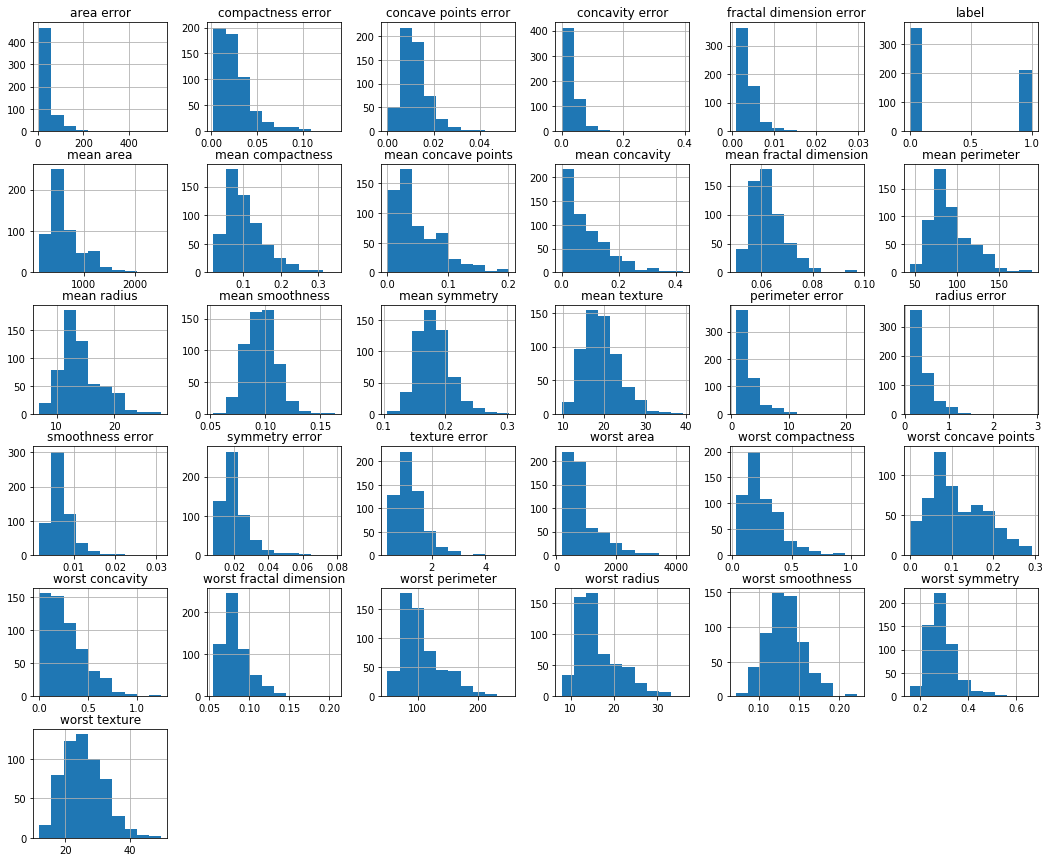

In [64]:
df.hist(bins=10,figsize=(18,15));

A feature **worst smoothness** é a que mais se asemelha a uma distribuição normal, seus valores estão distribuidos quase que uniforme em tono de seu valor medio 

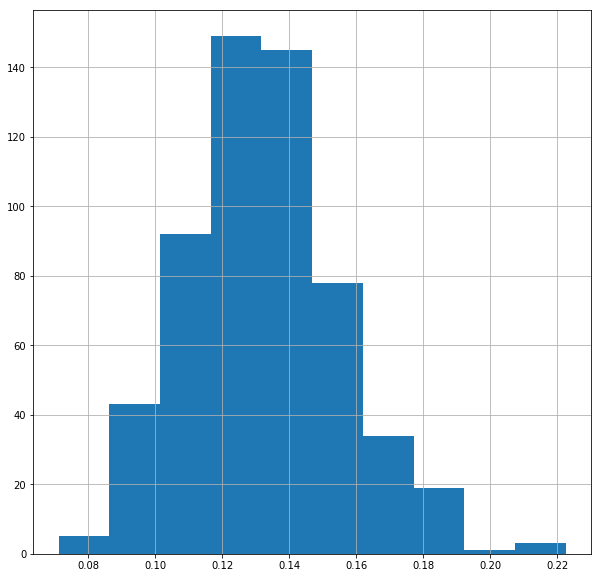

In [67]:
df['worst smoothness'].hist(bins=10, figsize=(10,10));

## Separando feaure e label

In [73]:
X = df.values[:,:-1]
y = df.values[:,-1]

## Defininco conjutos de teste e treino

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [105]:
X_train.dtype

dtype('float64')

## Normalizando dados

In [112]:
scale = StandardScaler()
X_train_stand = scale.fit_transform(X_train)
X_test_stand = scale.transform(X_test)

## Definindo modelos

In [175]:
model_Perceptron = Perceptron(max_iter=50,tol=0.1)
model_SGD = SGDRegressor(max_iter=50, tol=0.1)
model_LR = LogisticRegression()

## Predição sem standarlização

In [192]:
model_Perceptron.fit(X_train,y_train);
predict_Perceptron = model_Perceptron.predict(X_test);
acuracy_perceptron = metrics.metrics.acuracy(y_test,predict_Perceptron)
acuracy_perceptron

0.9090909090909091

In [177]:
model_SGD.fit(X_train,y_train)
predict_SGD = model_SGD.predict(X_test)
acuracy_SGD = metrics.metrics.acuracy(y_test,predict_SGD)
acuracy_SGD

0.0

In [191]:
model_LR.fit(X_train,y_train);
predict_LR = model_LR.predict(X_test)
acuracy_LR = metrics.metrics.acuracy(y_test,predict_LR)
acuracy_LR

/home/aluno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.965034965034965

## Pedrição standalizada

In [195]:
model_Perceptron.fit(X_train_stand,y_train);
predict_stand_Perceptron = model_Perceptron.predict(X_test_stand);
acuracy_stand_perceptron = metrics.metrics.acuracy(y_test,predict_stand_Perceptron)
acuracy_stand_perceptron

0.972027972027972

In [185]:
model_SGD.fit(X_train_stand,y_train)
predict_stand_SGD = model_SGD.predict(X_test_stand)
acuracy_stand_SGD = metrics.metrics.acuracy(y_test,predict_stand_SGD)
acuracy_stand_SGD

0.0

In [193]:
model_LR.fit(X_train_stand,y_train);
predict_stand_LR = model_LR.predict(X_test_stand)
acuracy_stand_LR = metrics.metrics.acuracy(y_test,predict_stand_LR)
acuracy_stand_LR

/home/aluno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.972027972027972

SGDRegression apresentou a pior acurancia em ambus os casos. <br/>
Sem standalizar a Losgistic Regression apresentou a melhor acuracia, ja estandalizado ele e o perceptrom ficam com a mesma acuracia. <br/>